# Stacking

In [ ]:
import numpy as np
from Scratch.Bagging import BaggedModels
from sklearn.model_selection import train_test_split

class StackedModels:
    def __init__(self, paste=False):
        self.paste = paste
    
    def __call__(self, instances):
        return self.predict(instances)
    
    def fit(self, X, y, models, meta_learner):
        X1, X2 = np.split(X, 2)
        y1, y2 = np.split(y, 2)
        self.layer1 = BaggedModels(paste=self.paste)
        self.meta_learner = meta_learner
        self.layer1.fit(X1, y1, models)
        preds = self.layer1(X2)
        self.meta_learner.fit(preds, y2)
    
    def predict(self, instances):
        temp_preds = self.layer1.predict(instances)
        return self.meta_learner.predict(temp_preds)

## Stacked Generalization

In [1]:
from Scratch.Stacking import StackedModels

In [2]:
from Scratch.helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split(n_samples=15000)

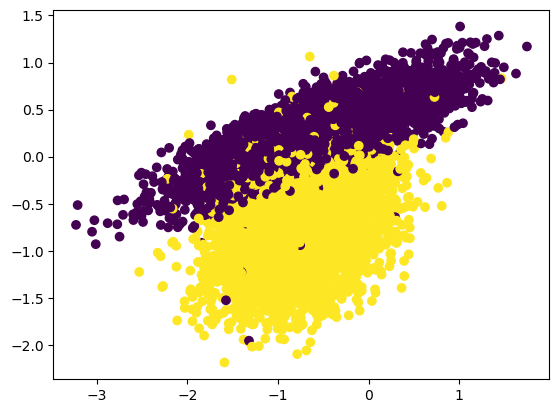

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC

In [5]:
models = [KNN(), LR(), SVC()]
meta_learner = DT()
model = StackedModels()
model.fit(X_train, y_train, models, meta_learner)
preds = model(X_test)

C:\Users\Angel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Angel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [6]:
from Scratch.helpers.Evaluation import classification_stats
metrics = classification_stats(preds, y_test, binary=False)
metrics

{'acc': 0.938}

In [7]:
for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    metrics = classification_stats(preds, y_test, binary=False)
    print(f"{model}:, {metrics}")

C:\Users\Angel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier():, {'acc': 0.9253333333333333}
LogisticRegression():, {'acc': 0.934}
SVC():, {'acc': 0.937}


In [8]:
from Scratch.Bagging import BaggedModels
models = [KNN(), LR(), SVC(), DT()]
model = BaggedModels()
model.fit(X_train, y_train, models)
classification_stats(model(X_test, take_mode=True), y_test, binary=False)

C:\Users\Angel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'acc': 0.937}